In [1]:
!pip3 install openpyxl xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 4.5 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 8.8 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np

In [141]:
#df = pd.read_excel("dl4se.xlsx", sheet_name=0, header=0)
df = pd.read_csv('dl4se.csv')

In [142]:
df.loc[df["Method"] == "DNN","Method"] = "Other"
df.loc[df["Hyperparam tuning"] == "cross validation", "Hyperparam tuning"] = "none"
df.loc[df["SE task"] == "", "SE task"] = "lit review"

In [143]:
df.head()

,Number,Title,Link to paper,Year,Code?,Data?,Compare to non-DL?,Venue,SE task,Method,Hyperparam tuning,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1.0,Deep Semantic Feature Learning for Software De...,https://www.cs.purdue.edu/homes/lintan/publica...,2018.0,No,No,Yes,ICSE,defect prediction,Sequence,grid search,NaN,Literature review,Valid options,NaN,NaN
1,2.0,CRADLE: Cross-Backend Validation to Detect and...,https://www.cs.purdue.edu/homes/lintan/publica...,2019.0,No,Yes,No,ICSE,bug localization,Convolutional,none,NaN,NaN,SE task,Method,Yes/No
2,3.0,A Neural Language Model with a Modified Attent...,https://ieeexplore.ieee.org/document/8663962,2018.0,No,Yes,Yes,ICSESS,language model,Sequence,none,NaN,NaN,defect prediction,Sequence,Yes
3,4.0,How Well Do Change Sequences Predict Defects? ...,http://sccpu2.cse.ust.hk/castle/materials/TSE1...,2019.0,No,Yes,Yes,TSE,defect prediction,Sequence,none,NaN,NaN,bug localization,Convolutional,No
4,5.0,DeepJIT: An End-to-End Deep Learning Framework...,https://posl.ait.kyushu-u.ac.jp/~kamei/publica...,2019.0,Yes,Yes,No,MSR,defect prediction,Convolutional,none,NaN,NaN,language model,Feedforward,NaN


In [144]:
len(df)

228

In [145]:
# Fill in the SE Task column
# First, remove rows with no method
df[(df["Method"].isnull()) & (~np.isnan(df["Number"]))]

,Number,Title,Link to paper,Year,Code?,Data?,Compare to non-DL?,Venue,SE task,Method,Hyperparam tuning,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
6,7.0,Towards Accurate Duplicate Bug Retrieval Using...,http://ieeexplore.ieee.org/document/8094414/,2017.0,Yes,Yes,Yes,ICSME,duplicate bug detection,NaN,none,NaN,NaN,duplicate bug detection,Graph,NaN
12,13.0,Are deep neural networks the best choice for m...,https://dl.acm.org/doi/pdf/10.1145/3106237.310...,2017.0,Yes,Yes,Yes,FSE,language model,NaN,none,NaN,NaN,image processing,Transformer,NaN
23,24.0,A neural framework for retrieval and summariza...,https://dl.acm.org/doi/10.1145/3238147.3240471,2018.0,No,Yes,Yes,ASE,code comprehension,NaN,none,NaN,NaN,NaN,NaN,NaN
40,40.0,Differentiable programs with neural libraries,https://www.microsoft.com/en-us/research/wp-co...,2017.0,No,No,No,ICML,code comprehension,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,41.0,Making neural programming architectures genera...,https://arxiv.org/abs/1704.06611,2017.0,No,No,No,ICLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,98.0,Machine/deep learning for software engineering...,https://ieeexplore.ieee.org/iel7/32/4359463/09...,2022.0,NaN,NaN,NaN,TSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,145.0,Automatic source code summarization with graph...,https://www.sciencedirect.com/science/article/...,2022.0,NaN,NaN,NaN,JSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,149.0,On the Use of Deep Learning in Software Defect...,https://arxiv.org/ftp/arxiv/papers/2210/2210.0...,2022.0,NaN,NaN,NaN,JSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
# Fill in the SE Task column
# First, remove rows with no method
df = df[(df["Method"].notnull()) | (np.isnan(df["Number"]))]

In [147]:
len(df)

220

In [148]:
df[df["SE task"].isnull()] = np.NaN

In [149]:
df.loc[:,"SE task"] = df["SE task"].fillna(method="ffill")

In [150]:
# Compare to non-DL count
df[(df["Compare to non-DL?"] != "no") &
   (df["Compare to non-DL?"] != "No") &
   (df["Title"].notnull())].shape

(80, 16)

In [151]:
# Non-trivial HPO count
df[(df["Hyperparam tuning"] != "grid search") &
   (df["Hyperparam tuning"] != "dev set") &
   (df["Hyperparam tuning"] != "cross validation") &
   (df["Hyperparam tuning"] != "none") &
   (df["Title"].notnull())].shape

(34, 16)

In [152]:
# HPO count
df[(df["Hyperparam tuning"] != "none") &
   (df["Title"].notnull())].shape

(61, 16)

In [153]:
# Non-trivial HPO + compare to non-DL count
df[(df["Hyperparam tuning"] != "grid search") &
   (df["Hyperparam tuning"] != "dev set") &
   (df["Hyperparam tuning"] != "none") &
   (df["Compare to non-DL?"] != "no") &
   (df["Compare to non-DL?"] != "No") &
   (df["Title"].notnull())].shape

(17, 16)

In [154]:
list(df[(df["Hyperparam tuning"] != "grid search") &
   (df["Hyperparam tuning"] != "dev set") &
   (df["Hyperparam tuning"] != "none") &
   (df["Compare to non-DL?"] != "no") &
   (df["Compare to non-DL?"] != "No") &
   (df["Title"].notnull())]['Title'])

['Suggesting Accurate Method and Class Names',
 'Automated Vulnerability Detection in Source Code Using Deep Representation Learning',
 'A convolutional attention network for extreme summarization of source code',
 'Automating intention mining',
 'Sentiment analysis for software engineering: How far can we go?',
 '500+ times faster than deep learning: A case study exploring faster methods for text mining stackoverflow',
 'Automatically learning semantic features for defect prediction',
 'Neuro-symbolic program corrector for introductory programming assignments',
 'Deep green: Modelling time-series of software energy consumption',
 'On the Value of Oversampling for Deep Learning in Software Defect Prediction',
 'Old but Gold: Reconsidering the value of feedforward learners for software analytics',
 'Why and what happened? Aiding bug comprehension with automated category and causal link identification',
 'FIRA: Fine-Grained Graph-Based Code Change Representation for Automated Commit Mess

In [155]:
# Compare to non-DL count
df[(df["Compare to non-DL?"] != "no") &
   (df["Compare to non-DL?"] != "No") &
   (df["Title"].notnull())].shape

(80, 16)

In [156]:
df.groupby(["SE task", "Method"]).apply(lambda df: len(df))

SE task                  Method             
Code Synthesis           Attention               1
                         Convolutional           4
                         Embedding               1
                         Other                   1
                         Sequence               19
Feature Envy Detection   Convolutional           1
Program Repair           Other                   1
                         Sequence                5
Program Repair/Bug Fix   Sequence                1
                         Transformer             1
Software Categorization  Other                   1
                         Sequence                1
Software Energy Metrics  Feedforward             1
Testing                  word2vec                1
Vulnerability Detection  Convolutional           1
                         Embedding               1
                         Graph                   2
                         Sequence                2
bug localization         Convolutiona

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [158]:
data = df.groupby(["SE task", "Method"]).apply(lambda df: len(df))

In [159]:
data.shape

(59,)

In [160]:
data

SE task                  Method             
Code Synthesis           Attention               1
                         Convolutional           4
                         Embedding               1
                         Other                   1
                         Sequence               19
Feature Envy Detection   Convolutional           1
Program Repair           Other                   1
                         Sequence                5
Program Repair/Bug Fix   Sequence                1
                         Transformer             1
Software Categorization  Other                   1
                         Sequence                1
Software Energy Metrics  Feedforward             1
Testing                  word2vec                1
Vulnerability Detection  Convolutional           1
                         Embedding               1
                         Graph                   2
                         Sequence                2
bug localization         Convolutiona

In [161]:
pd.DataFrame(data)

0
SE task                 Method                 
Code Synthesis          Attention             1
                        Convolutional         4
                        Embedding             1
                        Other                 1
                        Sequence             19
Feature Envy Detection  Convolutional         1
Program Repair          Other                 1
                        Sequence              5
Program Repair/Bug Fix  Sequence              1
                        Transformer           1
Software Categorization Other                 1
                        Sequence              1
Software Energy Metrics Feedforward           1
Testing                 word2vec              1
Vulnerability Detection Convolutional         1
                        Embedding             1
                        Graph                 2
                        Sequence              2
bug localization        Convolutional         1
                        Graph                 1
                        Other                 1
code comprehension      Attention             1
                        Convolutional         1
                        Embedding             1
                        Graph                 3
                        Sequence             18
                        word2vec              1
code similarity         Attention             1
                        Convolutional         2
                        Feedforward           1
                        Graph                 1
                        Other                 1
                        Sequence              2
code smell              Embedding             1
                        Feedforward           1
defect prediction       Convolutional         2
                        Deep Belief Network   1
                        Embedding             3
                        Feedforward           1
                        Sequence              5
image processing        Convolutional         1
issue close time        Feedforward           1
                        Sequence              1
language model          Convolutional         1
                        Embedding             2
                        Graph                 2
                        Sequence             10
                        Transformer           5
                        word2vec              1
language processing     Attention             1
                        Convolutional         5
                        Feedforward           1
                        Graph                 2
                        Sequence             17
                        word2vec              4
other                   Feedforward           1
                        Graph                 1
                        Sequence              2
vulnerability detection Sequence              1

In [162]:
idx_len = len(np.unique(df["SE task"].dropna()))
col_len = len(np.unique(df["Method"].dropna()))

In [163]:
idx_len, col_len

(19, 10)

In [164]:
np.unique(df["SE task"].dropna())

array(['Code Synthesis', 'Feature Envy Detection', 'Program Repair',
       'Program Repair/Bug Fix', 'Software Categorization',
       'Software Energy Metrics', 'Testing', 'Vulnerability Detection',
       'bug localization', 'code comprehension', 'code similarity',
       'code smell', 'defect prediction', 'image processing',
       'issue close time', 'language model', 'language processing',
       'other', 'vulnerability detection'], dtype=object)

In [165]:
idx = []
cols = []
dat = np.zeros(shape=(idx_len, col_len))

for index, group in df.groupby(["SE task", "Method"]):
    if index[0] not in idx:
        idx.append(index[0])
    if index[1] not in cols:
        cols.append(index[1])
        
    i = idx.index(index[0])
    j = cols.index(index[1])
    dat[i][j] = len(group)

In [166]:
plot_data = pd.DataFrame(data=dat, index=idx, columns=cols)

In [167]:
plot_data.head()

,Attention,Convolutional,Embedding,Other,Sequence,Transformer,Feedforward,word2vec,Graph,Deep Belief Network
Code Synthesis,1.0,4.0,1.0,1.0,19.0,0.0,0.0,0.0,0.0,0.0
Feature Envy Detection,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Program Repair,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0
Program Repair/Bug Fix,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Software Categorization,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [168]:
plot_data.loc["total", :] = plot_data.sum(axis=0)

In [169]:
plot_data.loc[:, "total"] = plot_data.sum(axis=1)

In [170]:
plot_data

,Attention,Convolutional,Embedding,Other,Sequence,Transformer,Feedforward,word2vec,Graph,Deep Belief Network,total
Code Synthesis,1.0,4.0,1.0,1.0,19.0,0.0,0.0,0.0,0.0,0.0,26.0
Feature Envy Detection,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Program Repair,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,6.0
Program Repair/Bug Fix,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
Software Categorization,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
Software Energy Metrics,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Testing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Vulnerability Detection,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,6.0
bug localization,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
code comprehension,1.0,1.0,1.0,0.0,18.0,0.0,0.0,1.0,3.0,0.0,25.0


In [171]:
plot_data.to_excel('dl4se.xlsx')

In [172]:
plot_data = plot_data.sort_values(by='total', ascending=False, axis=1).sort_values(by='total', axis=0, ascending=False)

In [173]:
plot_data = plot_data.drop('total', axis=0).drop('total', axis=1)

In [174]:
plot_data.index

Index(['language processing', 'Code Synthesis', 'code comprehension',
       'language model', 'defect prediction', 'code similarity',
       'Program Repair', 'Vulnerability Detection', 'other',
       'bug localization', 'issue close time', 'Program Repair/Bug Fix',
       'Software Categorization', 'code smell', 'image processing',
       'Feature Envy Detection', 'Testing', 'Software Energy Metrics',
       'vulnerability detection'],
      dtype='object')

In [175]:
plot_data.columns

Index(['Sequence', 'Convolutional', 'Graph', 'Embedding', 'Feedforward',
       'word2vec', 'Transformer', 'Other', 'Attention', 'Deep Belief Network'],
      dtype='object')

In [176]:
plot_data

,Sequence,Convolutional,Graph,Embedding,Feedforward,word2vec,Transformer,Other,Attention,Deep Belief Network
language processing,17.0,5.0,2.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0
Code Synthesis,19.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
code comprehension,18.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
language model,10.0,1.0,2.0,2.0,0.0,1.0,5.0,0.0,0.0,0.0
defect prediction,5.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0
code similarity,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
Program Repair,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Vulnerability Detection,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
other,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
bug localization,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [177]:
plot_data.sum()

Sequence               84.0
Convolutional          19.0
Graph                  12.0
Embedding               9.0
Feedforward             7.0
word2vec                7.0
Transformer             6.0
Other                   5.0
Attention               4.0
Deep Belief Network     1.0
dtype: float64

In [178]:
plot_data.sum().sum()

154.0

## Getting counts of papers matching criteria

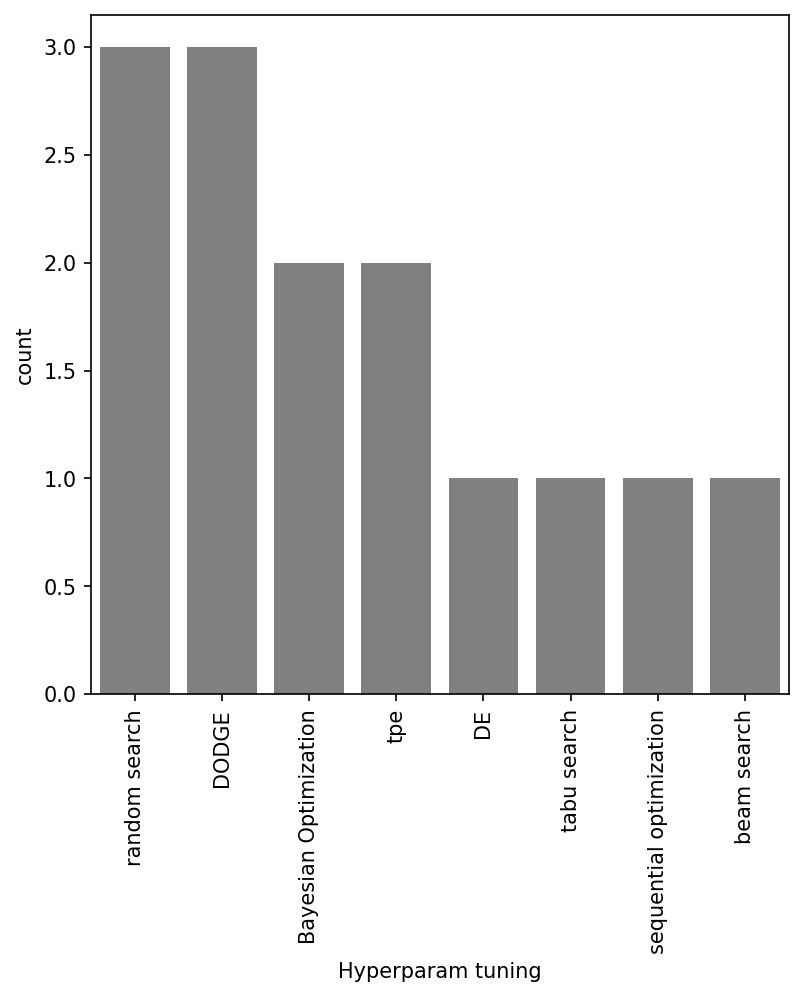

In [212]:
df.loc[df["Hyperparam tuning"] == "epsilon dom", "Hyperparam tuning"] = "DODGE"
df.loc[df["Hyperparam tuning"] == "unspecified", "Hyperparam tuning"] = "none"
df.loc[df["Hyperparam tuning"] == "validation set", "Hyperparam tuning"] = "dev set"
df.loc[df["Hyperparam tuning"] == "grid", "Hyperparam tuning"] = "grid search"

df_nt_hyp = df[(df["Hyperparam tuning"] != "grid search") &
   (df["Hyperparam tuning"] != "dev set") &
   (df["Hyperparam tuning"] != "cross validation") &
   (df["Hyperparam tuning"] != "none") &
   (df["Hyperparam tuning"]) &
   (df["Title"].notnull())]

hyp_counts = df_nt_hyp["Hyperparam tuning"].value_counts()
filtered_hyps = hyp_counts.index
sorted_hyps = hyp_counts.index

fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=150)
sns.countplot(data=df_nt_hyp[df_nt_hyp["Hyperparam tuning"].isin(filtered_hyps)], x="Hyperparam tuning", order=filtered_hyps, color='grey')
plt.xticks(rotation=90);
plt.savefig("./nt_hyp_methods.jpg", bbox_inches="tight");

In [183]:
df_nt_hyp.shape

(14, 16)

In [184]:
df_nt_hyp

,Number,Title,Link to paper,Year,Code?,Data?,Compare to non-DL?,Venue,SE task,Method,Hyperparam tuning,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
18,19.0,Learning Program Embeddings to Propagate Feedb...,https://stanford.edu/~cpiech/bio/papers/progra...,2015.0,No,Yes,No,ICML,language model,Sequence,random search,NaN,NaN,Testing,NaN,NaN
20,21.0,Suggesting Accurate Method and Class Names,https://homepages.inf.ed.ac.uk/csutton/publica...,2015.0,No,No,Yes,FSE,code comprehension,Sequence,Bayesian Optimization,NaN,NaN,other,NaN,NaN
39,39.0,A convolutional attention network for extreme ...,https://arxiv.org/pdf/1602.03001.pdf,2016.0,Yes,Yes,Yes,ICML,code comprehension,Convolutional,Bayesian Optimization,NaN,NaN,NaN,NaN,NaN
47,45.0,Automating intention mining,https://ieeexplore.ieee.org.prox.lib.ncsu.edu/...,2018.0,Yes,Yes,Yes,TSE,language processing,Convolutional,DE,NaN,NaN,NaN,NaN,NaN
121,106.0,On the Value of Oversampling for Deep Learning...,https://arxiv.org/abs/2008.03835,2021.0,Yes,Yes,Yes,TSE,defect prediction,Feedforward,DODGE,NaN,NaN,NaN,NaN,NaN
124,108.0,Old but Gold: Reconsidering the value of feedf...,https://arxiv.org/abs/2101.06319,2022.0,Yes,Yes,Yes,arXiv,issue close time,Feedforward,tabu search,NaN,NaN,NaN,NaN,NaN
146,121.0,Why and what happened? Aiding bug comprehensio...,https://link-springer-com.prox.lib.ncsu.edu/co...,2021.0,No,No,Yes,EMSE,language processing,Attention,sequential optimization,NaN,NaN,NaN,NaN,NaN
170,136.0,Fold2Vec: Towards a Statement Based Representa...,https://dl.acm.org/doi/pdf/10.1145/3514232,2023.0,Yes,Yes,No,TOSEM,code comprehension,Sequence,random search,NaN,NaN,NaN,NaN,NaN
173,137.0,DEAR: A Novel Deep Learning-based Approach for...,https://arxiv.org/pdf/2205.01859.pdf,2022.0,Yes,Yes,No,ICSE,Program Repair,Sequence,beam search,NaN,NaN,NaN,NaN,NaN
183,143.0,Towards Learning Generalizable Code Embeddings...,https://dl.acm.org/doi/pdf/10.1145/3542944,2023.0,Yes,Yes,No,TOSEM,language model,Graph,random search,NaN,NaN,NaN,NaN,NaN


## Generating individual sheets

In [185]:
compare_df = pd.DataFrame(index=plot_data.index, columns=plot_data.columns)

for y in range(plot_data.shape[0]):
    for x in range(plot_data.shape[1]):
        compare_df[plot_data.columns[x]][plot_data.index[y]] = \
            len(df[(df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x]) &
                  (df['Compare to non-DL?'] != 'no') & (df['Compare to non-DL?'] != 'No')])

In [186]:
compare_df

,Sequence,Convolutional,Graph,Embedding,Feedforward,word2vec,Transformer,Other,Attention,Deep Belief Network
language processing,9,4,1,0,1,4,0,0,1,0
Code Synthesis,5,1,0,0,0,0,0,0,0,0
code comprehension,9,1,1,1,0,1,0,0,0,0
language model,7,1,0,2,0,0,0,0,0,0
defect prediction,4,1,0,1,1,0,0,0,0,1
code similarity,1,0,1,0,1,0,0,0,1,0
Program Repair,2,0,0,0,0,0,0,0,0,0
Vulnerability Detection,2,1,1,1,0,0,0,0,0,0
other,2,0,1,0,1,0,0,0,0,0
bug localization,0,0,1,0,0,0,0,1,0,0


In [187]:
compare_df.sum().sum()

80

In [188]:
hyp_df = pd.DataFrame(index=plot_data.index, columns=plot_data.columns)

for y in range(plot_data.shape[0]):
    for x in range(plot_data.shape[1]):
        hyp_df[plot_data.columns[x]][plot_data.index[y]] = \
            len(df[(df['Hyperparam tuning'] != 'none') & (df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])

In [189]:
hyp_df

,Sequence,Convolutional,Graph,Embedding,Feedforward,word2vec,Transformer,Other,Attention,Deep Belief Network
language processing,5,5,1,0,1,0,0,0,1,0
Code Synthesis,9,1,0,0,0,0,0,0,0,0
code comprehension,6,1,0,0,0,0,0,0,0,0
language model,4,0,1,0,0,0,3,0,0,0
defect prediction,2,1,0,0,1,0,0,0,0,1
code similarity,0,2,0,0,0,0,0,1,0,0
Program Repair,2,0,0,0,0,0,0,0,0,0
Vulnerability Detection,0,1,1,0,0,0,0,0,0,0
other,1,0,1,0,1,0,0,0,0,0
bug localization,0,0,1,0,0,0,0,0,0,0


In [190]:
hyp_df.sum().sum()

60

In [194]:
hyp_nt_df = pd.DataFrame(index=plot_data.index, columns=plot_data.columns)

for y in range(plot_data.shape[0]):
    for x in range(plot_data.shape[1]):
        hyp_nt_df[plot_data.columns[x]][plot_data.index[y]] = \
            len(df[(df["Hyperparam tuning"] != "grid search") & \
            (df["Hyperparam tuning"] != "dev set") & \
            (df["Hyperparam tuning"] != "cross validation") & \
            (df["Hyperparam tuning"] != "none") & \
            (df["Hyperparam tuning"]) & \
            (df["Title"].notnull()) & (df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])

In [206]:
hyp_nt_df

,Sequence,Convolutional,Graph,Embedding,Feedforward,word2vec,Transformer,Other,Attention,Deep Belief Network
language processing,0,1,0,0,0,0,0,0,1,0
Code Synthesis,0,0,0,0,0,0,0,0,0,0
code comprehension,2,1,0,0,0,0,0,0,0,0
language model,1,0,1,0,0,0,1,0,0,0
defect prediction,0,0,0,0,1,0,0,0,0,0
code similarity,0,0,0,0,0,0,0,0,0,0
Program Repair,1,0,0,0,0,0,0,0,0,0
Vulnerability Detection,0,0,0,0,0,0,0,0,0,0
other,0,0,1,0,1,0,0,0,0,0
bug localization,0,0,0,0,0,0,0,0,0,0


In [196]:
hyp_nt_df.sum().sum()

14

In [197]:
all_df = pd.DataFrame(index=plot_data.index, columns=plot_data.columns)

for y in range(plot_data.shape[0]):
    for x in range(plot_data.shape[1]):
        all_df[plot_data.columns[x]][plot_data.index[y]] = \
            len(df[(df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x]) &
                  (df['Compare to non-DL?'] != 'no') & (df['Compare to non-DL?'] != 'No') &
                  (df['Hyperparam tuning'] != 'none') & (df['Hyperparam tuning'] != 'dev set') &
                  (df['Hyperparam tuning'] != 'grid search') & (df['Hyperparam tuning'] != 'cross validation')])

In [66]:
all_df

,Sequence,Convolutional,Graph,Embedding,Feedforward,word2vec,Transformer,Other,Attention,Deep Belief Network
language processing,1,2,1,0,0,0,0,0,1,0
Code Synthesis,0,0,0,0,0,0,0,0,0,0
code comprehension,1,1,0,0,0,0,0,0,0,0
language model,0,0,0,0,0,0,0,0,0,0
defect prediction,0,0,0,0,1,0,0,0,0,1
code similarity,0,0,0,0,0,0,0,0,0,0
Program Repair,0,0,0,0,0,0,0,0,0,0
Vulnerability Detection,0,1,1,0,0,0,0,0,0,0
other,1,0,1,0,1,0,0,0,0,0
bug localization,0,0,1,0,0,0,0,0,0,0


In [67]:
all_df.sum().sum()

17

## Generating heatmaps

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

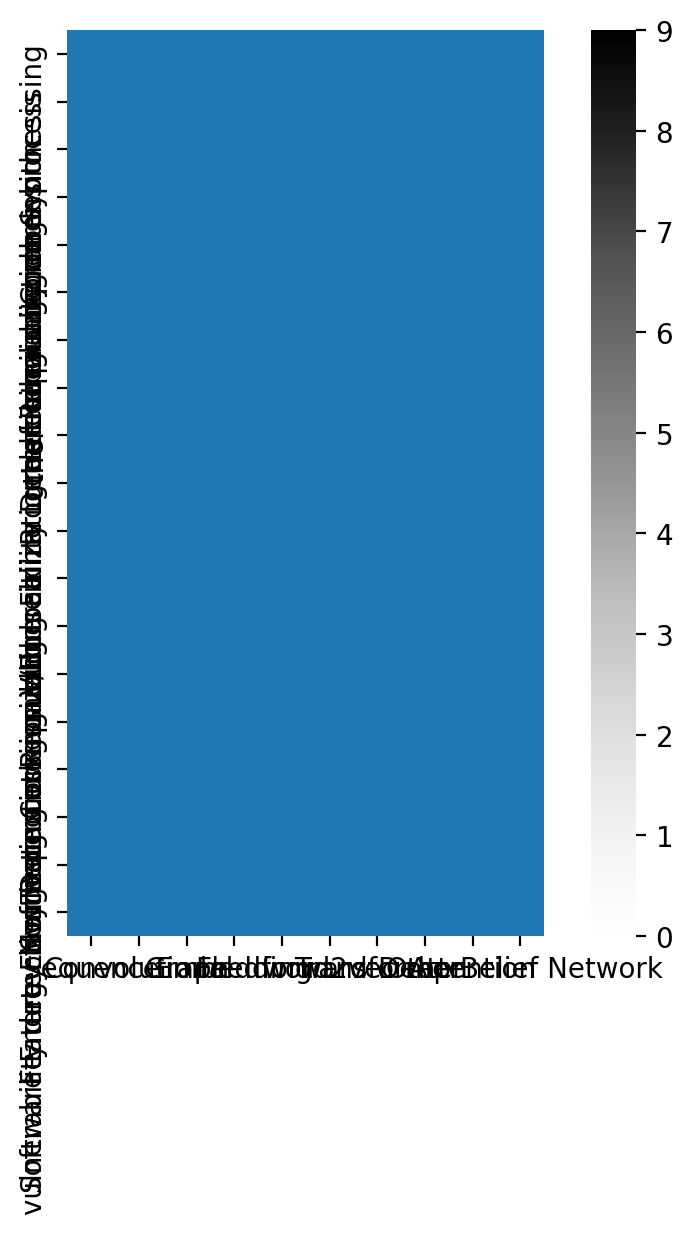

In [68]:
# Compare to non-DL
_, ax = plt.subplots(figsize=(6, 6), dpi=200)
sns.heatmap(compare_df, square=True, ax=ax, cmap='Greys', cbar=True);

for y in range(plot_data.shape[0]):
    for x in range(plot_data.shape[1]):
        m = len(df[(df['Compare to non-DL?'] == 'Yes') & (df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])
        n = len(df[(df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])
        ax.text(x + 0.5, y + 0.5, '{0}'.format(m if m > 0 else ""),
                 horizontalalignment='center',
                 verticalalignment='center',
                 c=('white' if (y == 0 and x < 1 or x == 0 and y < 3) else 'black'), 
                 fontdict={'size': 8, 'weight': 'bold'}
                 )

_.savefig("./heatmap-nondl.jpg", bbox_inches='tight', pad_inches=.2)

In [69]:
plot_data.sum().sum()

154.0

In [70]:
df[(df['Compare to non-DL?'] == 'Yes') & (df['SE task'] == plot_data.index[0]) & (df['Method'] == plot_data.columns[1])]

,Number,Title,Link to paper,Year,Code?,Data?,Compare to non-DL?,Venue,SE task,Method,Hyperparam tuning,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
47,45.0,Automating intention mining,https://ieeexplore.ieee.org.prox.lib.ncsu.edu/...,2018.0,Yes,Yes,Yes,TSE,language processing,Convolutional,DE,NaN,NaN,NaN,NaN,NaN
78,70.0,Predicting semantically linkable knowledge in ...,https://ieeexplore.ieee.org/stamp/stamp.jsp?tp...,2016.0,No,Yes,Yes,ASE,language processing,Convolutional,grid search,NaN,NaN,NaN,NaN,NaN
85,75.0,Convolutional neural networks over tree struct...,https://arxiv.org/pdf/1409.5718.pdf,2016.0,No,No,Yes,AAAI,language processing,Convolutional,dev set,NaN,NaN,NaN,NaN,NaN


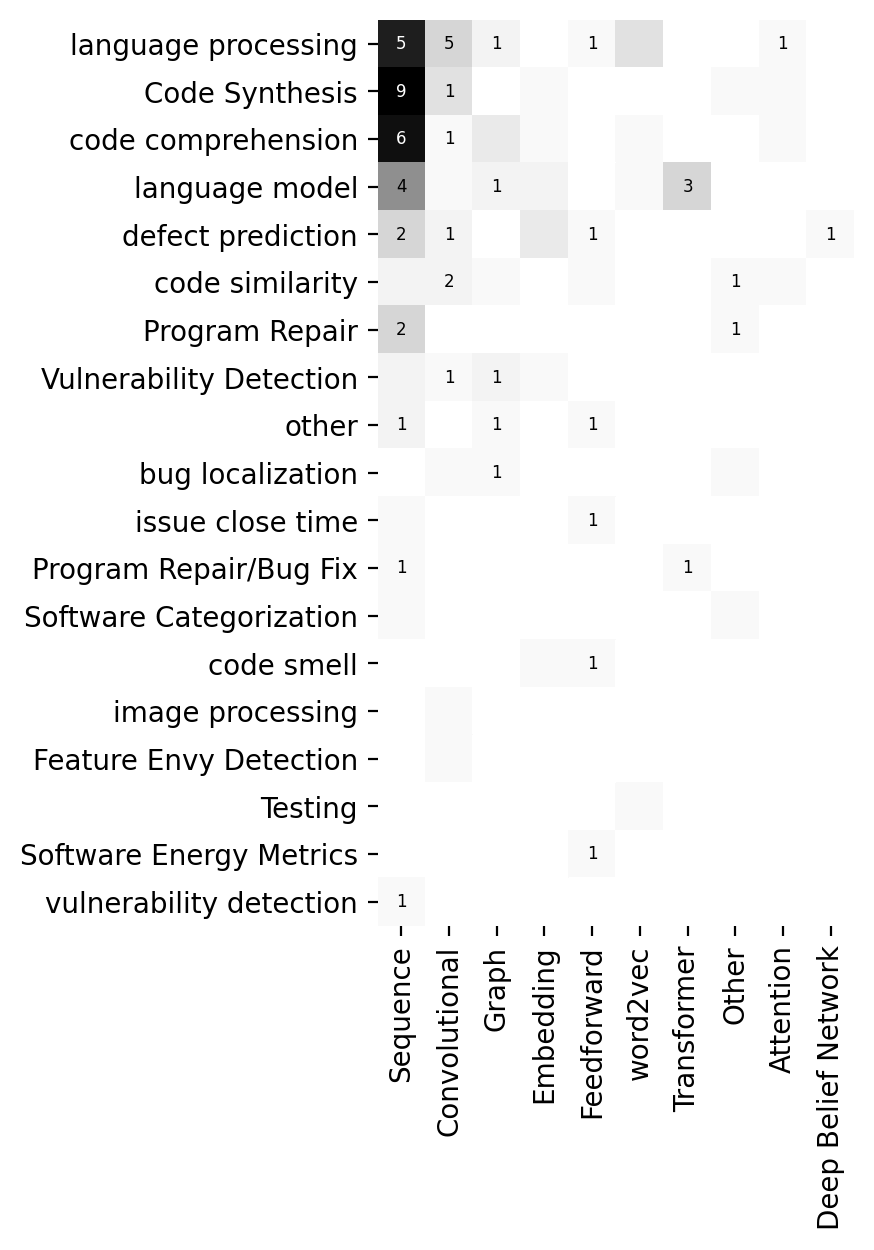

In [123]:
_, ax = plt.subplots(figsize=(6, 6), dpi=200)
sns.heatmap(plot_data, square=True, ax=ax, cmap='Greys', cbar=False);

for y in range(plot_data.shape[0]):
    for x in range(plot_data.shape[1]):
        m = len(df[(df['Hyperparam tuning'] != 'none') & (df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])
        n = len(df[(df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])
        ax.text(x + 0.5, y + 0.5, '{0}'.format(m if m > 0 else ""),
                 horizontalalignment='center',
                 verticalalignment='center',
                 c=('white' if (y == 0 and x < 1 or x == 0 and y < 3) else 'black'), 
                 fontdict={'size': 6}
                 )
plt.savefig("heatmaps_hyp.jpg")
#plt.title('Literature review of deep learning papers in software engineering\n(up to date as of September 2020), spanning 94 papers. Values\nin cells are the number of papers tuning hyper-parameters in\nsome way. Shading represents total number of papers for the cell.', fontdict={'size': 7});

In [209]:
plot_data

,Sequence,Convolutional,Graph,Embedding,Feedforward,word2vec,Transformer,Other,Attention,Deep Belief Network
language processing,17.0,5.0,2.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0
Code Synthesis,19.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
code comprehension,18.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
language model,10.0,1.0,2.0,2.0,0.0,1.0,5.0,0.0,0.0,0.0
defect prediction,5.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0
code similarity,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
Program Repair,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Vulnerability Detection,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
other,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
bug localization,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [224]:
plt.rcParams['font.family'] = 'serif'

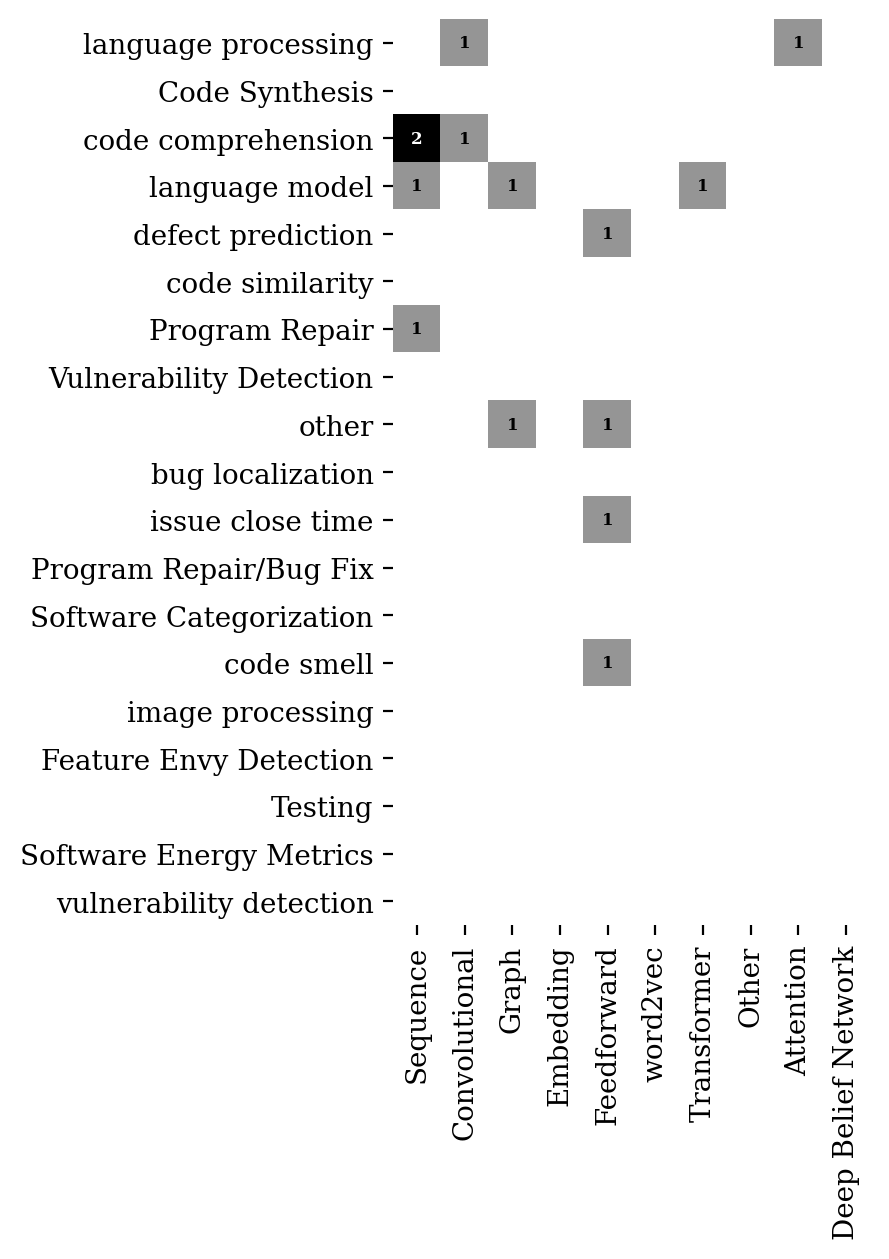

In [225]:
_, ax = plt.subplots(figsize=(6, 6), dpi=200)
sns.heatmap(hyp_nt_df.astype(float), square=True, ax=ax, cmap='Greys', cbar=False);

for y in range(hyp_nt_df.shape[0]):
    for x in range(hyp_nt_df.shape[1]):
        m = len(df[(df['Hyperparam tuning'] != 'cross validation') & (df['Hyperparam tuning']) & (df['Hyperparam tuning'] != 'none') & (df['Hyperparam tuning'] != 'dev set') & (df['Hyperparam tuning'] != 'grid search') & (df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])
        n = len(df[(df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])
        ax.text(x + 0.5, y + 0.5, '{0}'.format(m if m > 0 else ""),
                 horizontalalignment='center',
                 verticalalignment='center',
                 c=('white' if (y == 0 and x < 1 or x == 0 and y < 3) else 'black'), 
                 fontdict={'size': 6, 'weight': 'bold'}
                 )

plt.savefig('heatmaps_nt_hyp.jpg', bbox_inches='tight', pad_inches=.2)
plt.show()
#plt.title('Literature review of deep learning papers in software engineering\n(up to date as of September 2020), spanning 94 papers. Values\nin cells are the number of papers tuning hyper-parameters in\nsome way (excluding grid search and using a validation set).', fontdict={'size': 7});

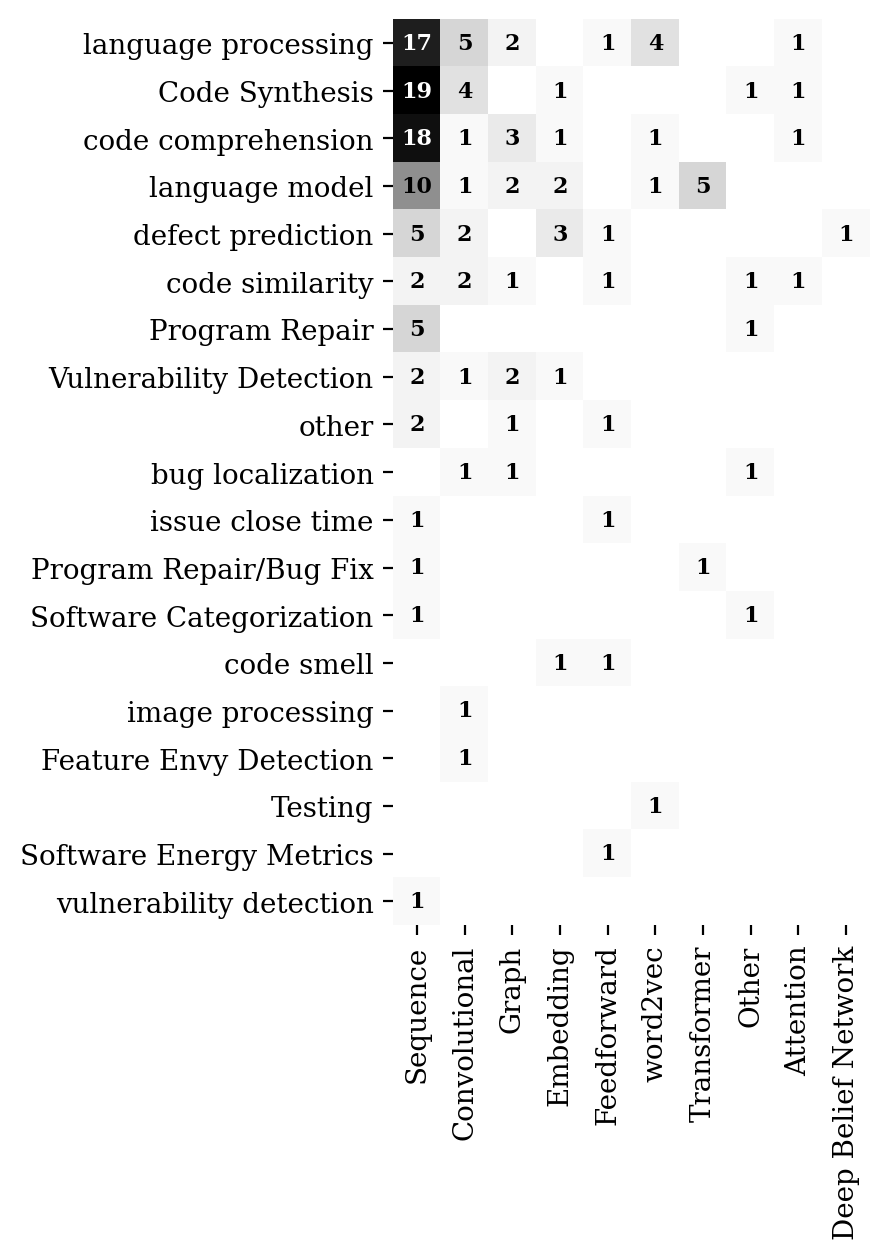

In [226]:
_, ax = plt.subplots(figsize=(6, 6), dpi=200)
sns.heatmap(plot_data, square=True, ax=ax, cmap='Greys', cbar=False);

for y in range(plot_data.shape[0]):
    for x in range(plot_data.shape[1]):
        n = len(df[(df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])
        ax.text(x + 0.5, y + 0.5, '{0}'.format(n if n > 0 else ""),
                 horizontalalignment='center',
                 verticalalignment='center',
                 c=('white' if (y == 0 and x < 1 or x == 0 and y < 3) else 'black'), 
                 fontdict={'size': 8, 'weight': 'bold'}
                 )

plt.savefig("./heatmaps.jpg", bbox_inches='tight', pad_inches=.2)
#plt.title('Literature review of deep learning papers in software engineering\n(up to date as of September 2020), spanning 94 papers. Values\nin cells are the number of papers using a specifc architecture for the task.', fontdict={'size': 7});

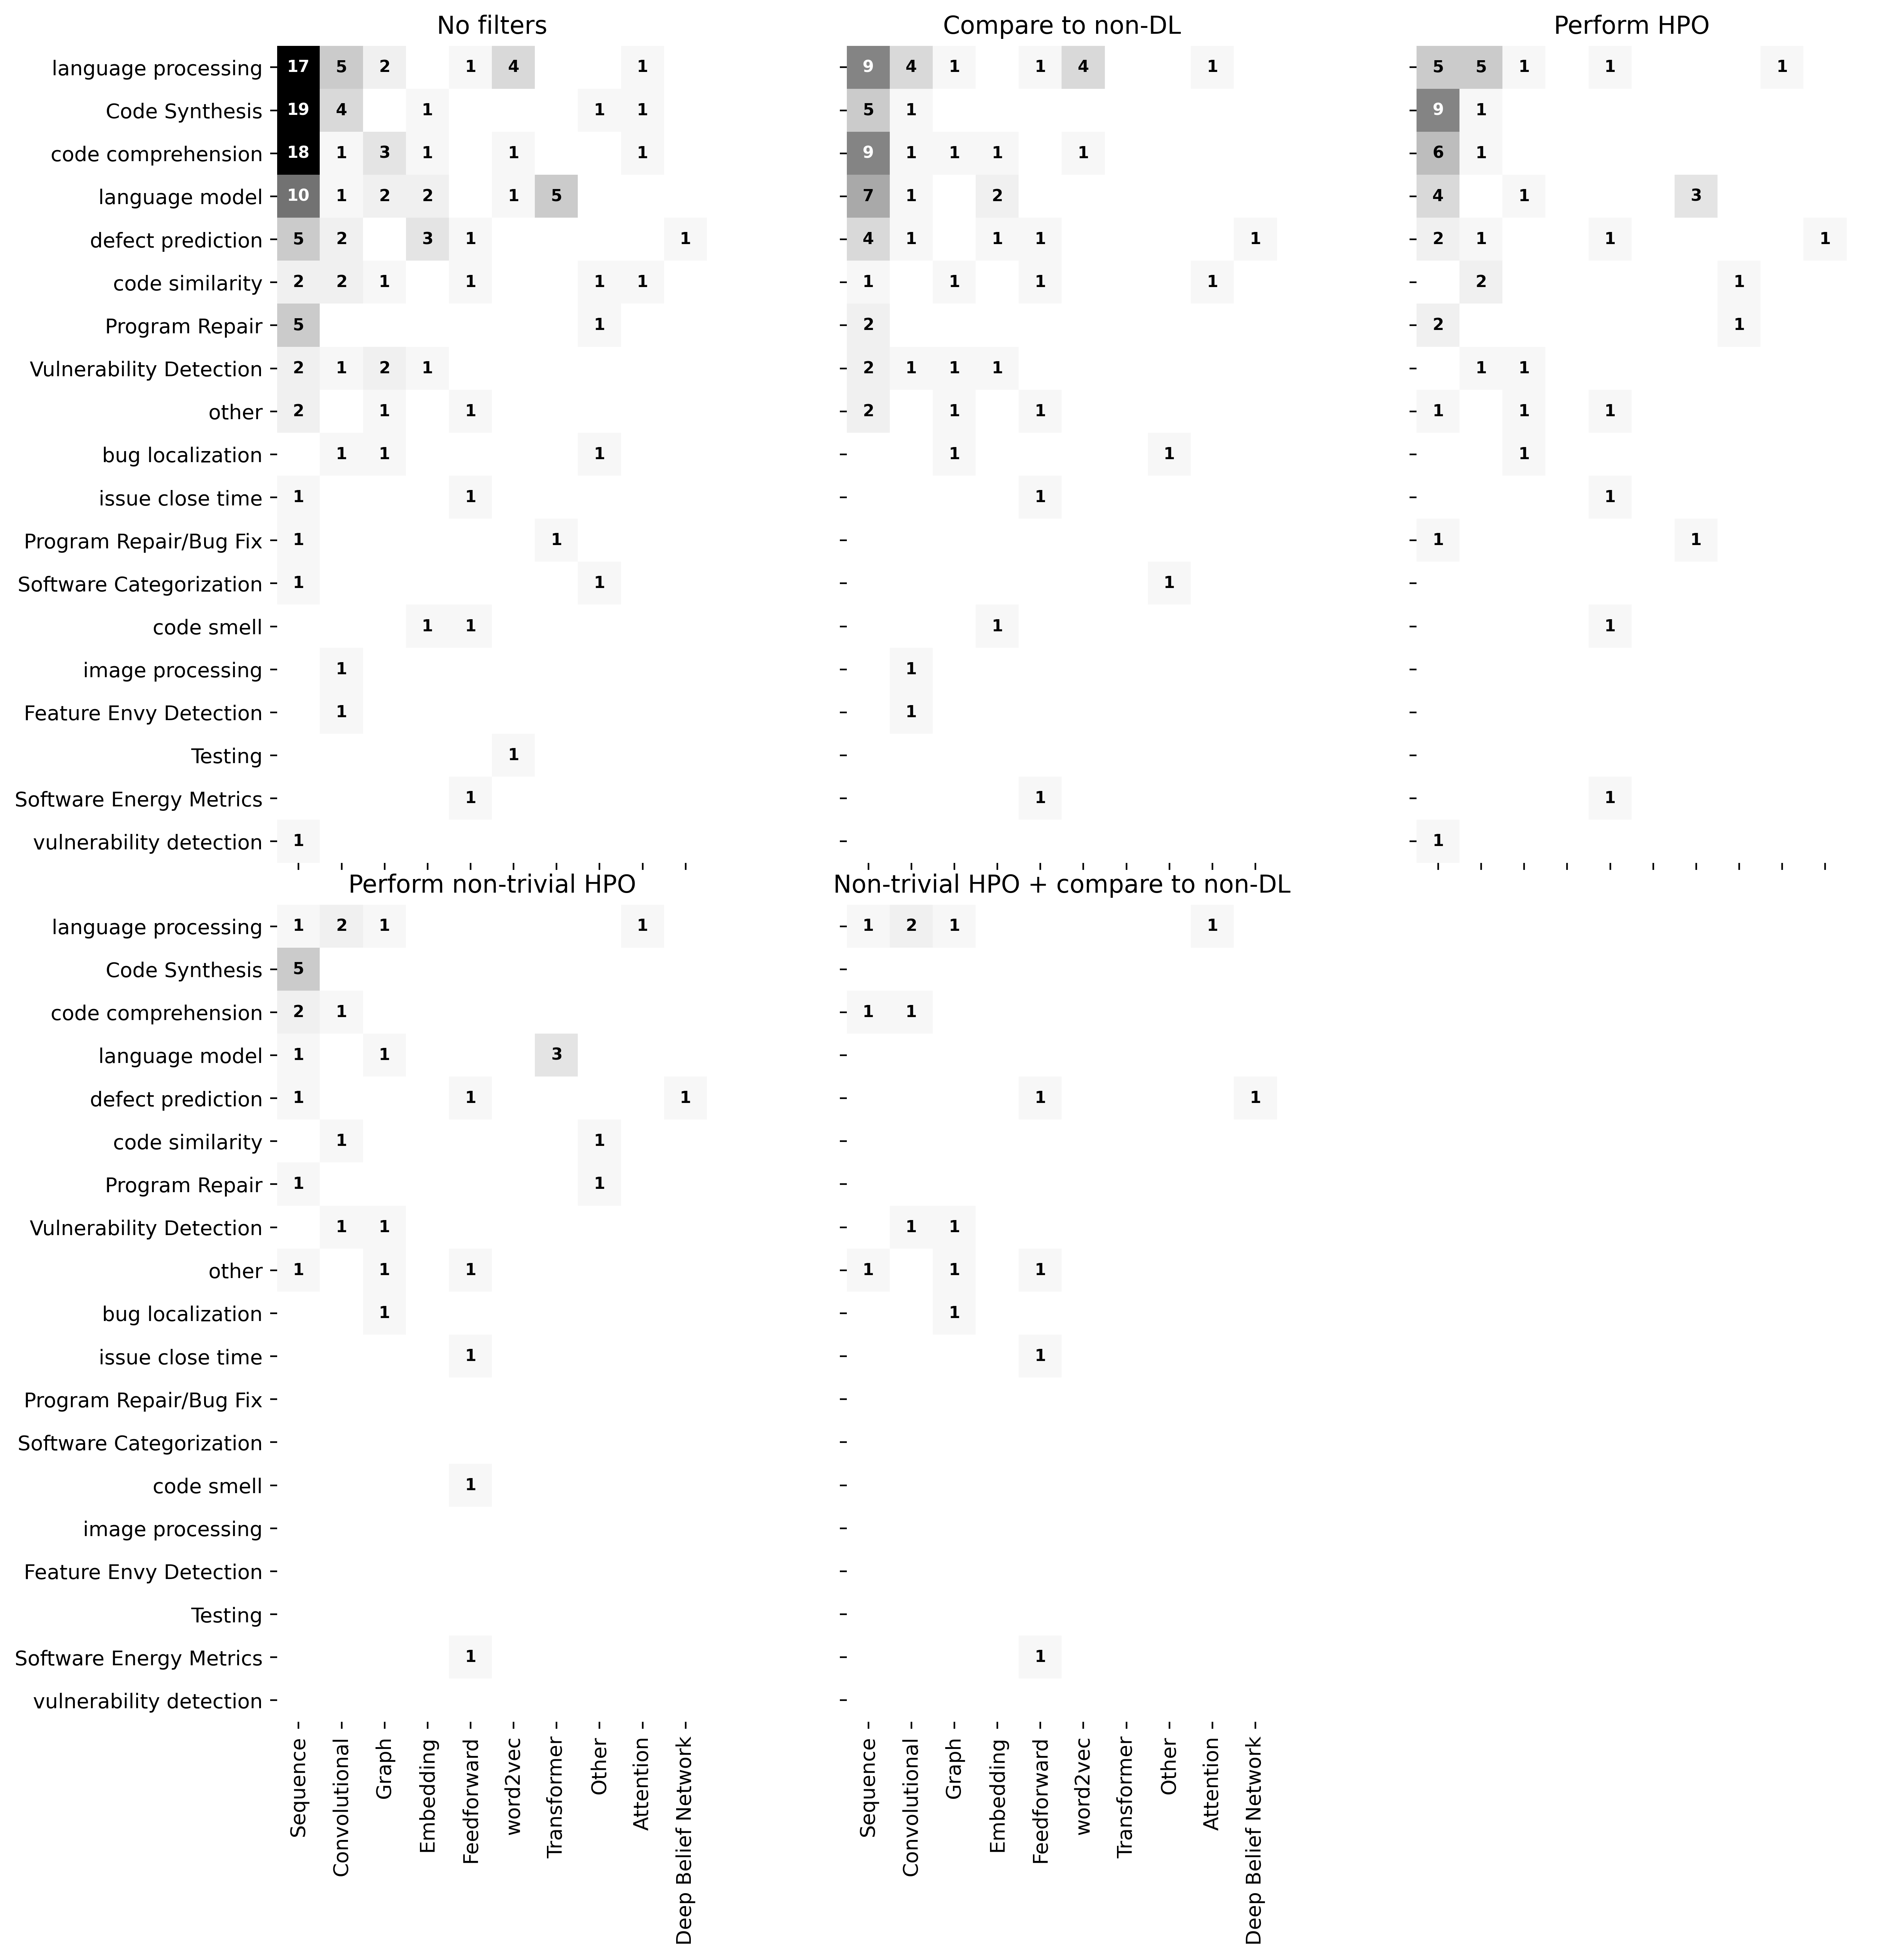

In [75]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 12), dpi=400, sharey=True, sharex=True);
fig.tight_layout()

# All
sns.heatmap(plot_data, square=True, ax=ax1, cmap='Greys', cbar=False, vmin=0, vmax=16);

for y in range(plot_data.shape[0]):
    for x in range(plot_data.shape[1]):
        m = len(df[(df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])
        n = len(df[(df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])
        ax1.text(x + 0.5, y + 0.5, '{0}'.format(n if n > 0 else ""),
                 horizontalalignment='center',
                 verticalalignment='center',
                 c=('white' if m > 7 else 'black'), 
                 fontdict={'size': 8, 'weight': 'bold'}
               )
ax1.set_title('No filters')

# Compared to non-DL
compare_df.fillna(value=np.nan, inplace=True)
compare_df = compare_df.loc[plot_data.index, plot_data.columns]
sns.heatmap(compare_df, square=True, ax=ax2, cmap='Greys', cbar=False, vmin=0, vmax=16);

for y in range(plot_data.shape[0]):
    for x in range(plot_data.shape[1]):
        m = len(df[(df['Compare to non-DL?'] != 'no') & (df['Compare to non-DL?'] != 'No') & (df['SE task'] == compare_df.index[y]) & (df['Method'] == compare_df.columns[x])])
        n = len(df[(df['SE task'] == compare_df.index[y]) & (df['Method'] == compare_df.columns[x])])
        ax2.text(x + 0.5, y + 0.5, '{0}'.format(m if m > 0 else ""),
                 horizontalalignment='center',
                 verticalalignment='center',
                 c=('white' if m > 7 else 'black'), 
                 fontdict={'size': 8, 'weight': 'bold'}
               )
ax2.set_title('Compare to non-DL')

# Perform HPO
hyp_df.fillna(value=np.nan, inplace=True)
hyp_df = hyp_df.loc[plot_data.index, plot_data.columns]
sns.heatmap(hyp_df, square=True, ax=ax3, cmap='Greys', cbar=False, vmin=0, vmax=16);

for y in range(plot_data.shape[0]):
    for x in range(plot_data.shape[1]):
        m = len(df[(df['Hyperparam tuning'] != 'none') & (df['SE task'] == hyp_df.index[y]) & (df['Method'] == hyp_df.columns[x])])
        n = len(df[(df['SE task'] == hyp_df.index[y]) & (df['Method'] == hyp_df.columns[x])])
        ax3.text(x + 0.5, y + 0.5, '{0}'.format(m if m > 0 else ""),
                 horizontalalignment='center',
                 verticalalignment='center',
                 c=('white' if m > 7 else 'black'), 
                 fontdict={'size': 8, 'weight': 'bold'}
               )
ax3.set_title('Perform HPO')

# Non-trivial HPO
hyp_nt_df.fillna(value=np.nan, inplace=True)
hyp_nt_df = hyp_nt_df.loc[plot_data.index, plot_data.columns]
sns.heatmap(hyp_nt_df, square=True, ax=ax4, cmap='Greys', cbar=False, vmin=0, vmax=16);

for y in range(plot_data.shape[0]):
    for x in range(plot_data.shape[1]):
        m = len(df[(df['Hyperparam tuning'] != 'none') & (df['Hyperparam tuning'] != 'dev set') & (df['Hyperparam tuning'] != 'grid search') & (df['Hyperparam tuning'] != 'cross validation') & (df['SE task'] == hyp_nt_df.index[y]) & (df['Method'] == hyp_nt_df.columns[x])])
        n = len(df[(df['SE task'] == hyp_nt_df.index[y]) & (df['Method'] == hyp_nt_df.columns[x])])
        ax4.text(x + 0.5, y + 0.5, '{0}'.format(m if m > 0 else ""),
                 horizontalalignment='center',
                 verticalalignment='center',
                 c=('white' if m > 7 else 'black'), 
                 fontdict={'size': 8, 'weight': 'bold'}
               )
ax4.set_title('Perform non-trivial HPO')

# Both
all_df.fillna(value=np.nan, inplace=True)
all_df = all_df.loc[plot_data.index, plot_data.columns]
sns.heatmap(all_df, square=True, ax=ax5, cmap='Greys', cbar=False, vmin=0, vmax=16);

for y in range(plot_data.shape[0]):
    for x in range(plot_data.shape[1]):
        m = len(df[(df['Compare to non-DL?'] != 'no') & (df['Compare to non-DL?'] != 'No') & (df['Hyperparam tuning'] != 'none') & (df['Hyperparam tuning'] != 'cross validation') & (df['Hyperparam tuning'] != 'dev set') & (df['Hyperparam tuning'] != 'grid search') & (df['SE task'] == all_df.index[y]) & (df['Method'] == all_df.columns[x])])
        n = len(df[(df['SE task'] == all_df.index[y]) & (df['Method'] == all_df.columns[x])])
        ax5.text(x + 0.5, y + 0.5, '{0}'.format(m if m > 0 else ""),
                 horizontalalignment='center',
                 verticalalignment='center',
                 c=('white' if m > 7 else 'black'), 
                 fontdict={'size': 8, 'weight': 'bold'}
               )
ax5.set_title('Non-trivial HPO + compare to non-DL')

ax6.axis('off');

In [221]:
df = df[~np.isnan(df["Year"])]

In [222]:
df["Year"] = df["Year"].astype(int)

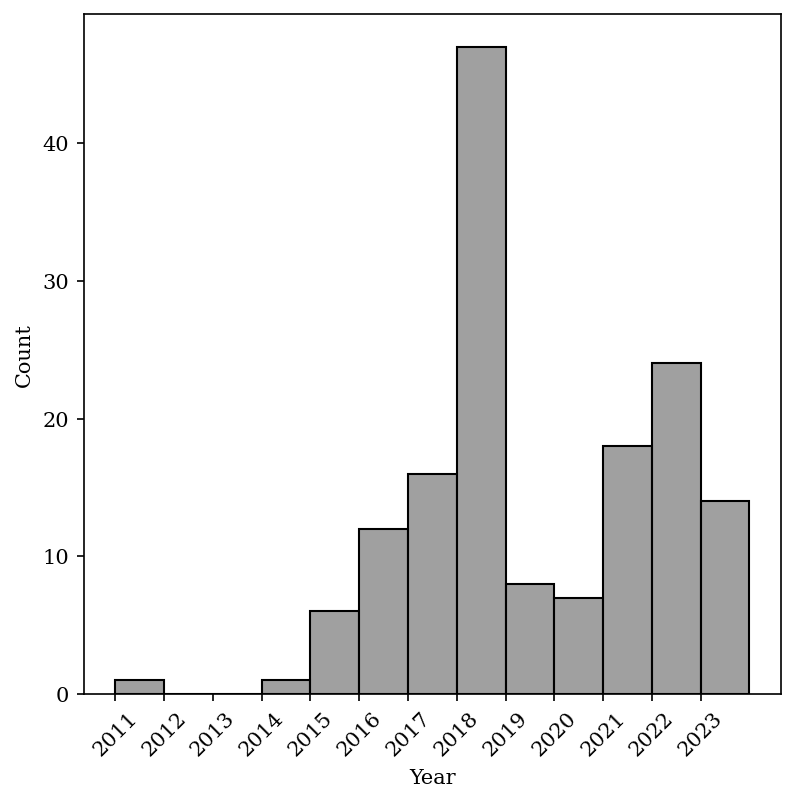

In [227]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=150)
g = sns.histplot(data=df, x="Year", ax=ax, bins=range(min(df["Year"]), max(df["Year"]) + 2), color='grey');
g.set_xticks(range(min(df["Year"]), max(df["Year"]) + 1));
plt.xticks(rotation=45);
plt.savefig("./years.jpg");

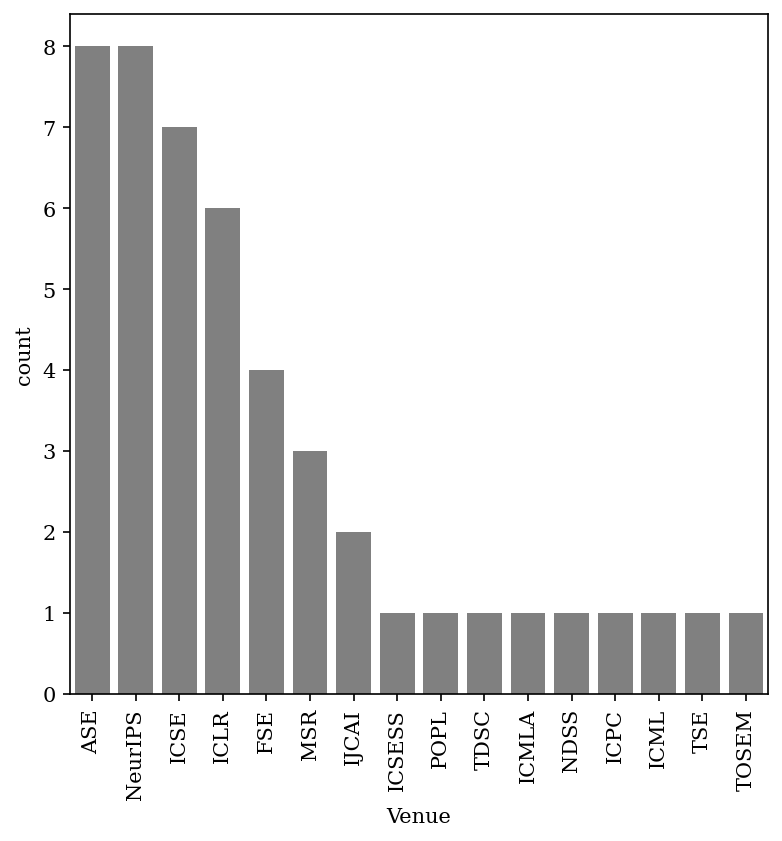

In [228]:
venue_counts = df[df["Year"] == 2018]["Venue"].value_counts()
sorted_venues = venue_counts.index

fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=150)
sns.countplot(data=df[df["Year"] == 2018], x="Venue", order=sorted_venues, color='grey');
plt.xticks(rotation=90);
plt.savefig("./venues_2018.jpg", bbox_inches="tight");

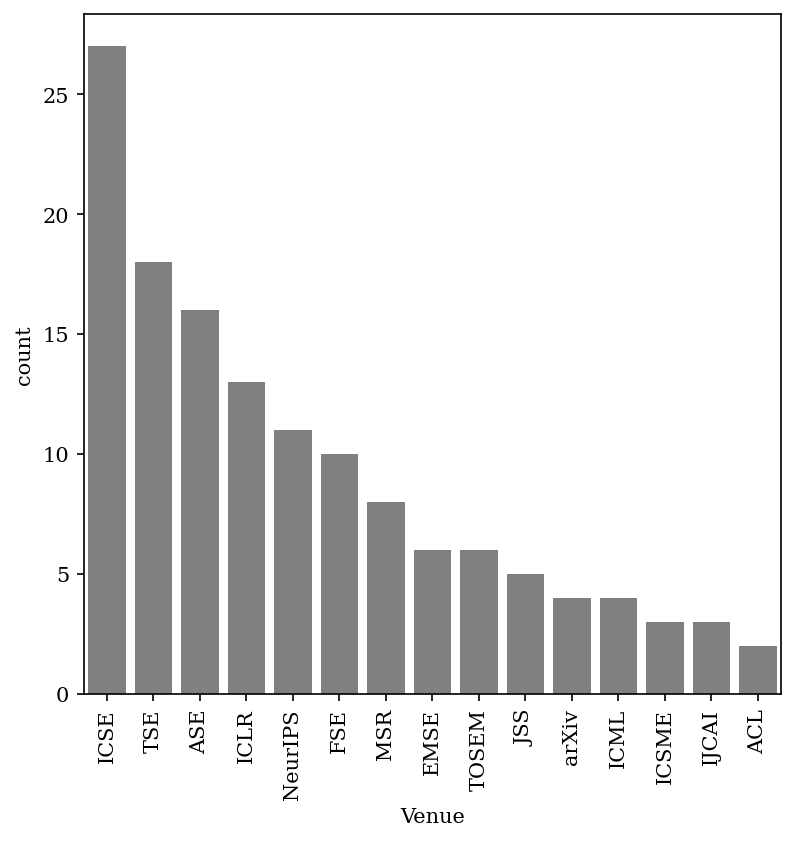

In [229]:
venue_counts = df["Venue"].value_counts()
filtered_venues = venue_counts[venue_counts > 1].index
sorted_venues = venue_counts.index

fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=150)
sns.countplot(data=df[df["Venue"].isin(filtered_venues)], x="Venue", order=filtered_venues, color='grey')
plt.xticks(rotation=90);
plt.savefig("./venues.jpg", bbox_inches="tight");

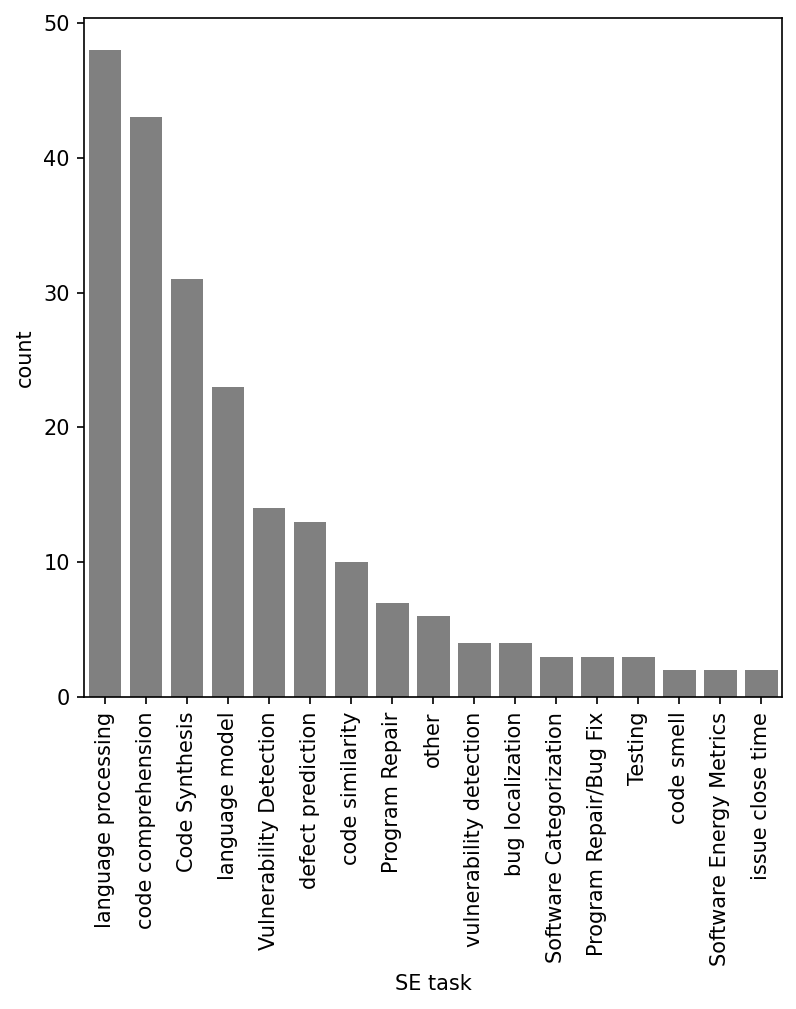

In [214]:
task_counts = df["SE task"].value_counts()
filtered_tasks = task_counts[task_counts > 1].index
sorted_tasks = task_counts.index

fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=150)
sns.countplot(data=df[df["SE task"].isin(filtered_tasks)], x="SE task", order=filtered_tasks, color='grey')
plt.xticks(rotation=90);
plt.savefig("./tasks.jpg");